In [2]:
%matplotlib inline

import datetime
import locale

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting french locale
locale.setlocale(locale.LC_ALL, 'fr_FR')

PLOT_VIGILO_RELEASE_DATE = True
PLOT_VIGILO_PRESS_CONFERENCE_DATE = True

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.8)
blue, orange = sns.color_palette("muted", 2)

In [3]:
# Getting data
resp = requests.get('https://vigilo.jesuisundesdeux.org/get_issues.php')
df = pd.DataFrame(resp.json())
df.time = pd.to_datetime(df.time, unit='s')

# Filtering out data before 2019-01-01
df = df[df.time.apply(lambda x: x.year) > 2018]
df = df.sort_values(by='time', ascending=True)
df = df.reset_index(drop=True)

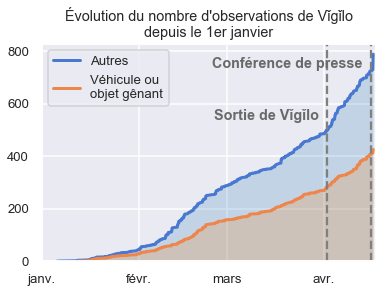

In [8]:
fig, ax = plt.subplots()

x1 = df.time
y1 = df.index
ax.plot(x1, y1, color=blue, lw=3, label='Autres')
ax.fill_between(x1, 0, y1, alpha=.2)

df2 = df[df.categorie == '2']
df2 = df2.reset_index(drop=True)

x2 = df2.time[df2.categorie == '2']
y2 = df2.index[df2.categorie == '2']
ax.plot(x2, y2, color=orange, lw=3, label='Véhicule ou\nobjet gênant')
ax.fill_between(x2, 0, y2, alpha=.2)

ticks = [datetime.datetime(year=2019, month=x, day=1) for x in range(1, 13)]
ticks_labels = [x.strftime('%b') for x in ticks]
plt.xticks(ticks, ticks_labels)
plt.gca().legend()

ticks = [datetime.datetime(year=2019, month=x, day=1) for x in range(1, 13)]
ticks_labels = [x.strftime('%b') for x in ticks]
plt.xticks(ticks, ticks_labels)

ylim = ax.get_ylim()

if PLOT_VIGILO_RELEASE_DATE:
    vigilo_release_date = datetime.datetime(year=2019, month=4, day=2)
    ax.plot((vigilo_release_date, vigilo_release_date), (0, 1000000), '--', color='grey')
    ax.text(x=vigilo_release_date,
            y=580,
            s='Sortie de Vǐgǐlo  ',
            horizontalalignment='right',
            verticalalignment='top',
            color='dimgrey',
            fontweight='bold')

if PLOT_VIGILO_PRESS_CONFERENCE_DATE:
    vigilo_release_date = datetime.datetime(year=2019, month=4, day=16)
    ax.plot((vigilo_release_date, vigilo_release_date), (0, 1000000), '--', color='grey')
    ax.text(x=vigilo_release_date,
            y=780,
            s='Conférence de presse  ',
            horizontalalignment='right',
            verticalalignment='top',
            color='dimgrey',
            fontweight='bold')

ax.set_xlim(datetime.date(year=2019, month=1, day=1), max(x1) + datetime.timedelta(days=1))
ax.set_ylim(0, ylim[1])

plt.title("Évolution du nombre d'observations de Vǐgǐlo\ndepuis le 1er janvier")

plt.show()